# **Elastic Net Regression**

Elastic Net Regression is a regularization technique that combines both Lasso Regression and Ridge Regression. It introduces penalties to the model, balancing the L1 norm (from Lasso) and the L2 norm (from Ridge) to create a more flexible regularization method. This helps improve predictive accuracy, deal with multicollinearity, and perform automatic feature selection.

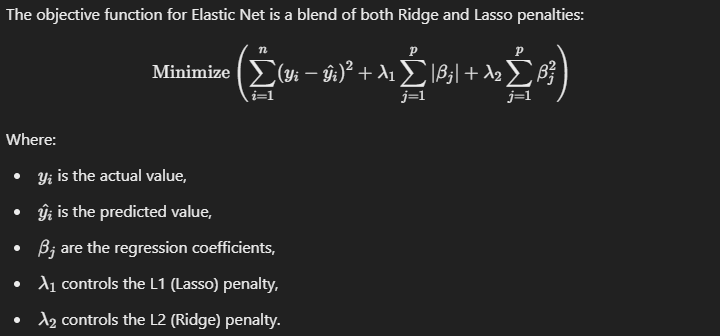

Elastic Net allows for the benefits of both Lasso and Ridge:

- **L1 penalty (Lasso)** encourages sparse solutions by shrinking some coefficients to exactly zero, thus selecting features.

- **L2 penalty (Ridge)** shrinks coefficients but keeps them non-zero, thus stabilizing the model when predictors are highly correlated.

### Why is Elastic Net Regression Important?

- **Combining Lasso and Ridge**: In situations where Lasso struggles (e.g., highly correlated features), Ridge can compensate. Elastic Net creates a balance between the two, offering a robust model that benefits from both feature selection and coefficient shrinkage.

- **Handles Multicollinearity**: Elastic Net is particularly useful when there are correlated predictors. It keeps Ridge's ability to handle multicollinearity while also keeping Lasso's feature selection capability.

- **Feature Selection**: Like Lasso, Elastic Net can shrink coefficients to zero, effectively eliminating irrelevant features from the model, which makes it interpretable and prevents overfitting.

- **Flexible Regularization**: It introduces two penalties (L1 and L2), giving you the flexibility to fine-tune the degree of regularization needed for the data, based on the dataset's complexity and feature correlation.

### How does Elastic Net Regression work?

**1. Initialization**: Start with the linear regression objective but add two penalty terms: one for Lasso (L1 norm) and one for Ridge (L2 norm).

**2. Blending penalties**: The model combines the advantages of both regularization techniques. The L1 penalty encourages sparsity by setting some coefficients to zero, while the L2 penalty helps when multicollinearity exists by shrinking the coefficients but keeping them non-zero.

**3. Hyperparameter tuning**: Elastic Net has two hyperparameters, (Lasso penalty strength) and (Ridge penalty strength). These are often tuned using cross-validation to find the optimal values that prevent overfitting while improving model performance.

**4. Optimization**: Elastic Net uses algorithms like coordinate descent to solve the objective function, iteratively adjusting the coefficients until an optimal solution is reached.

**5. Prediction**: After training, the model can predict outcomes based on the selected features and shrunk coefficients.


### When should you use Elastic Net Regression?

- **When features are highly correlated**: Lasso struggles with groups of highly correlated features by selecting only one and ignoring the others. Elastic Net, by blending Ridge, can distribute the effect across correlated features.

- **High-dimensional data**: In datasets where the number of features is much larger than the number of observations (e.g., in genomics or text classification), Elastic Net is helpful because it performs both feature selection (like Lasso) and shrinks the coefficients (like Ridge).

- **Sparse models**: If you expect only a subset of your predictors to be relevant, Elastic Net can shrink irrelevant predictors to zero, like Lasso.

- **Handling multicollinearity**: When predictors are highly correlated, Elastic Net is better suited than Lasso alone, since Ridge helps stabilize coefficient estimates in the presence of collinearity.

### Who uses Elastic Net Regression?

- **Data Scientists and Machine Learning Practitioners**: Elastic Net is a go-to choice when modeling datasets with many features or when there is multicollinearity, especially in high-stakes predictive tasks.

- **Bioinformaticians and Geneticists**: In fields like genomics, where there are many correlated features (genes), Elastic Net helps in selecting key predictors while accounting for correlations.

- **Economists and Statisticians**: Elastic Net is useful in domains where multicollinearity and high-dimensional datasets are common, as it balances the trade-off between bias and variance.

### Key Points to Remember:

- **L1 and L2 regularization**: Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization, balancing feature selection and coefficient shrinkage.

- **Tuning α and l1_ratio**: The mix between Lasso and Ridge penalties is controlled by the l1_ratio parameter. An α value helps control the overall strength of the regularization.

- **No perfect separation**: While Lasso is more aggressive in shrinking coefficients to zero, Elastic Net allows coefficients to stay small but non-zero when dealing with correlated features.

### Differences Between Elastic Net, Lasso, and Ridge:

- **Lasso (only L1 penalty)**: Performs automatic feature selection by shrinking some coefficients to zero, but struggles with correlated features.

- **Ridge (only L2 penalty)**: Shrinks coefficients uniformly without zeroing them out, handling multicollinearity but not performing feature selection.

- **Elastic Net**: Balances the two by performing feature selection like Lasso but also shrinking correlated features together like Ridge.

In [41]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [42]:
tips = pd.get_dummies(tips)
tips

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,False,True,False,False,True,False,False,True
240,27.18,2.00,2,False,True,True,False,False,False,True,False,False,True
241,22.67,2.00,2,True,False,True,False,False,False,True,False,False,True
242,17.82,1.75,2,True,False,False,True,False,False,True,False,False,True


In [43]:
X = tips.drop('tip', axis=1)
y = tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=19)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

ElasticNet()

In [45]:
y_pred = elastic_net.predict(X_test)
y_pred

array([3.22787603, 2.75553242, 2.98583549, 2.93657376, 2.81653161,
       2.85814622, 3.02869499, 3.33226823, 2.85601214, 2.97872189,
       2.80728392, 3.14873713, 3.52149022, 2.91701133, 2.92928231,
       2.84907637, 2.89904947, 2.80177087, 2.74681825, 3.23410043,
       3.47738585, 2.85654566, 2.79696919, 2.72014221, 2.85138829,
       2.94262032, 2.94564361, 2.86348143, 2.97498724, 2.942976  ,
       3.1030322 , 2.94422088, 2.80159303, 2.79732487, 2.91896757,
       2.95062313, 3.06248463, 2.93408399, 2.79696919, 2.93070503,
       2.89691539, 2.80159303, 3.20173352, 2.76922611, 2.90313979,
       3.01784673, 2.94937825, 2.86810527, 3.47454041])

In [46]:
mean_absolute_error(y_test, y_pred)

1.214329254741493

In [47]:
mean_squared_error(y_test, y_pred)

2.899097972303773

In [48]:
r2_score(y_test, y_pred)

0.14011647876429623

In [49]:
param_grid = {
    'alpha': [ 0.1,0.3,0.5,0.7,0.9,1.0 ],
    'l1_ratio': [ 0.1,0.3,0.5,0.7,0.9,1.0 ]
}

elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
elastic_net_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [50]:
y_pred2 = elastic_net_cv.predict(X_test)
y_pred2

array([4.36045835, 2.01577541, 3.49350917, 2.6632068 , 2.43904349,
       2.39559597, 3.21389761, 4.37446046, 2.65737098, 2.7356982 ,
       2.40921402, 4.13318475, 4.6636574 , 2.67645063, 2.83025002,
       2.48055813, 2.47870584, 2.54539045, 2.12747365, 4.0536548 ,
       4.76205469, 2.48556614, 2.21289653, 2.15979944, 2.52823827,
       2.84575684, 3.18666694, 2.56724603, 2.9643126 , 2.73268614,
       3.28063625, 3.04227102, 2.65903479, 2.40876079, 2.89783283,
       2.87108944, 3.6777688 , 2.65517579, 2.19874392, 2.82147533,
       2.61162889, 2.39085742, 3.45504734, 2.28645428, 2.73256056,
       3.06932308, 3.04475407, 2.58216077, 5.2470807 ])

In [51]:
mean_absolute_error(y_test, y_pred2)

0.9467399418855579

In [52]:
mean_squared_error(y_test, y_pred2)

1.9034103248341647

In [53]:
r2_score(y_test, y_pred2)

0.43544123444224914

In [54]:
elastic_net_cv.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [55]:
elastic_net_cv.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [56]:
elastic_net_cv.best_score_

-0.9574652456524534